# Regression with Linear Algebra - Lab

## Introduction

In this lab, you'll apply regression analysis using simple matrix manipulations to fit a model to given data, and then predict new values for previously unseen data. You'll follow the approach highlighted in the previous lesson where you used NumPy to build the appropriate matrices and vectors and solve for the $\beta$ (unknown variables) vector. The beta vector will be used with test data to make new predictions. You'll also evaluate the model fit.
In order to make this experiment interesting, you'll use NumPy at every single stage of this experiment, i.e., loading data, creating matrices, performing train-test split, model fitting, and evaluation.
  

## Objectives

In this lab you will:

- Use matrix algebra to calculate the parameter values of a linear regression


First, let's import necessary libraries: 

In [2]:
import csv  # for reading csv file
import numpy as np

## Dataset 

The dataset you'll use for this experiment is "**Sales Prices in the City of Windsor, Canada**". This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage), etc. and an output (dependent) variable, **price**.  You'll formulate a linear algebra problem to find linear mappings from input features using the equation provided in the previous lesson. 

This will allow you to find a relationship between house features and house price for the given data, allowing you to find unknown prices for houses, given the input features.  

A description of the dataset and included features is available [here](https://rdrr.io/cran/Ecdat/man/Housing.html).

In your repository, the dataset is available as `windsor_housing.csv`. There are 11 input features (first 11 columns):

	lotsize	bedrooms  bathrms  stories	driveway  recroom	fullbase  gashw	 airco  garagepl   prefarea

and 1 output feature i.e. **price** (12th column). 

The focus of this lab is not really answering a preset analytical question, but to learn how you can perform a regression experiment, using mathematical manipulations - similar to the one you performed using `statsmodels`. So you won't be using any `pandas` or `statsmodels` goodness here. The key objectives here are to: 

- Understand regression with matrix algebra and 
- Mastery in NumPy scientific computation

## Stage 1: Prepare data for modeling 

Let's give you a head start by importing the dataset. You'll perform the following steps to get the data ready for analysis:

* Initialize an empty list `data` for loading data
* Read the csv file containing complete (raw) `windsor_housing.csv`. [Use `csv.reader()` for loading data.](https://docs.python.org/3/library/csv.html). Store this in `data` one row at a time 

* Drop the first row of csv file as it contains the names of variables (header) which won't be used during analysis (keeping this will cause errors as it contains text values) 

* Append a column of all **1**s to the data (bias) as the first column

* Convert `data` to a NumPy array and inspect first few rows 

> NOTE: `read.csv()` reads the csv as a text file, so you should convert the contents to float.

In [3]:
# Your code here

# Step 1: Initializing an empty list data for loading data
data = []

# Step 2: Reading the csv file containing complete (raw) windsor_housing.csv
# Use csv.reader() for loading data. Store this in data one row at a time
with open('windsor_housing.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        data.append(row)

# Step 3: Dropping the first row of the csv file as it contains the names of variables (header)
# which won't be used during analysis
data = data[1:]

# Step 4: Appending a column of all 1s to the data (bias) as the first column
# I am  doing this to include the bias term in the linear regression equation
for i in range(len(data)):
    data[i] = [1.0] + [float(x) for x in data[i]]

# Step 5: Converting data to a NumPy array and inspect first few rows
data = np.array(data)

data[:5]

# First 5 rows of raw data

# array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
#         0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
#         4.20e+04],
#        [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         3.85e+04],
#        [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         4.95e+04],
#        [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
#         1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         6.05e+04],
#        [1.00e+00, 6.36e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         6.10e+04]])

array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        4.20e+04],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.85e+04],
       [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        4.95e+04],
       [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.05e+04],
       [1.00e+00, 6.36e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.10e+04]])

## Step 2: Perform a 80/20 train-test split

Explore NumPy's official documentation to manually split a dataset using a random sampling method of your choice. Some useful methods are located in the [numpy.random library](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).
* Perform a **random** 80/20 split on data using a method of your choice in NumPy
* Split the data to create `x_train`, `y_train`, `x_test`, and `y_test` arrays 
* Inspect the contents to see if the split performed as expected

> Note: When randomly splitting data, it's always recommended to set a seed in order to ensure reproducibility 

In [4]:
# Your code here


# Setting a seed for reproducibility
np.random.seed(42)

# Shuffling the data randomly
np.random.shuffle(data)

#  Calculating the index to split the data into 80% train and 20% test
split_index = int(0.8 * len(data))

# Splitting the data into train and test sets
train_data = data[:split_index]
test_data = data[split_index:]

# Splitting the features and the target variable (price) in the train and test sets
x_train = train_data[:, :-1]  # All columns except the last one (price column)
y_train = train_data[:, -1]   # Last column (price column)

x_test = test_data[:, :-1]    # All columns except the last one (price column)
y_test = test_data[:, -1]     # Last column (price column)

# Inspecting the shapes of the train and test sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)

# Split results
# Raw data Shape:  (546, 13)
# Train/Test Split: (437, 13) (109, 13)
# x_train, y_train, x_test, y_test: (437, 12) (437,) (109, 12) (109,)

x_train shape: (436, 12)
y_train shape: (436,)
x_test shape: (110, 12)


## Step 3: Calculate the `beta` 

With $X$ and $y$ in place, you can now compute your beta values with $x_\text{train}$ and $y_\text{train}$ as:
#### $\beta = (x_\text{train}^T. x_\text{train})^{-1} . x_\text{train}^T . y_\text{train}$

* Using NumPy operations (transpose, inverse) that we saw earlier, compute the above equation in steps 
* Print your beta values 

In [5]:
# Your code here
# Step 1:  Calculating the transpose of x_train
x_train_transpose = np.transpose(x_train)

# Step 2:  Calculating the dot product of x_train_transpose and x_train
dot_product1 = np.dot(x_train_transpose, x_train)

# Step 3:  Calculating the inverse of the dot product (if it is invertible)
try:
    inverse_dot_product1 = np.linalg.inv(dot_product1)
except np.linalg.LinAlgError:
    print("The dot product is not invertible. Cannot calculate beta.")
    exit()

# Step 4: Calculating the dot product of inverse_dot_product1 and x_train_transpose
dot_product2 = np.dot(inverse_dot_product1, x_train_transpose)

# Step 5:  Calculating the dot product of dot_product2 and y_train to get the beta values
beta = np.dot(dot_product2, y_train)

# Print the beta values
print("Beta values:", beta)

# Beta values
# Due to random split, your answers may vary
# [-5.46637290e+03  3.62457767e+00  2.75100964e+03  1.47223649e+04
#   5.97774591e+03  5.71916945e+03  5.73109882e+03  3.83586258e+03
#   8.12674607e+03  1.33296437e+04  3.74995169e+03  1.01514699e+04]

Beta values: [-5.38015682e+03  3.61607721e+00  2.79537630e+03  1.46041637e+04
  5.94362097e+03  5.66768748e+03  5.79509103e+03  3.85979509e+03
  8.15013547e+03  1.32143920e+04  3.81173934e+03  1.02195413e+04]


## Step 4: Make predictions
Great, you now have a set of coefficients that describe the linear mappings between $X$ and $y$. You can now use the calculated beta values with the test datasets that we left out to calculate $y$ predictions. Next, use all features in turn and multiply it with this beta. The result will give a prediction for each row which you can append to a new array of predictions.

$\hat{y} = x\beta = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + \ldots + \beta_m x_m $ 

* Create a new empty list (`y_pred`) for saving predictions
* For each row of `x_test`, take the dot product of the row with beta to calculate the prediction for that row
* Append the predictions to `y_pred`
* Print the new set of predictions

In [6]:
# Step 1: Creating a new empty list (y_pred) for saving predictions
y_pred = []

# Step 2: For each row of x_test, I'll take the dot product of the row with beta to calculate the prediction for that row
for row in x_test:
    prediction = np.dot(row, beta)
    y_pred.append(prediction)

# Step 3: Converting y_pred to a NumPy array
y_pred = np.array(y_pred)

# Print the new set of predictions
print("Predictions:", y_pred)


Predictions: [ 90623.70521474  56233.50098435  75562.96494009  76539.04664126
  67503.7523004   41179.66297532  39443.94591549  62917.52835014
  52567.06947014  91527.26624119  48688.44207941 103174.44182297
 114293.73251012 103012.8928626   66371.77151531  49353.58679246
  41071.18065908 120467.55790616  62522.01981626  46015.7989105
  33317.16524895  45566.75254972  56011.0302739   57618.61855909
  71680.24883395  59084.71314113  72592.32540692 106174.15655171
  57542.13892132  64875.96553818  67924.50319407  97219.44054712
  73747.11413977  71140.17855042 108613.56642118  40888.02096224
  92344.05360611  55914.90417773  86280.49902288  48122.53121463
  43060.02312346  65595.68705201  98862.36007721  40890.37679868
  69887.884499   105787.56811439  47278.92388396  79042.9446137
  63711.62462778  61361.226621    55367.93997921  55317.82203163
  41035.019887    53157.01178203  65178.0477879   84928.59328044
 117834.41278467  75903.30774295  49267.76634835 101117.1392332
  84268.6974483

## Step 5: Evaluate model 

### Visualize actual vs. predicted values
This is exciting, now your model can use the beta value to predict the price of houses given the input features. Let's plot these predictions against the actual values in `y_test` to see how much our model deviates. 

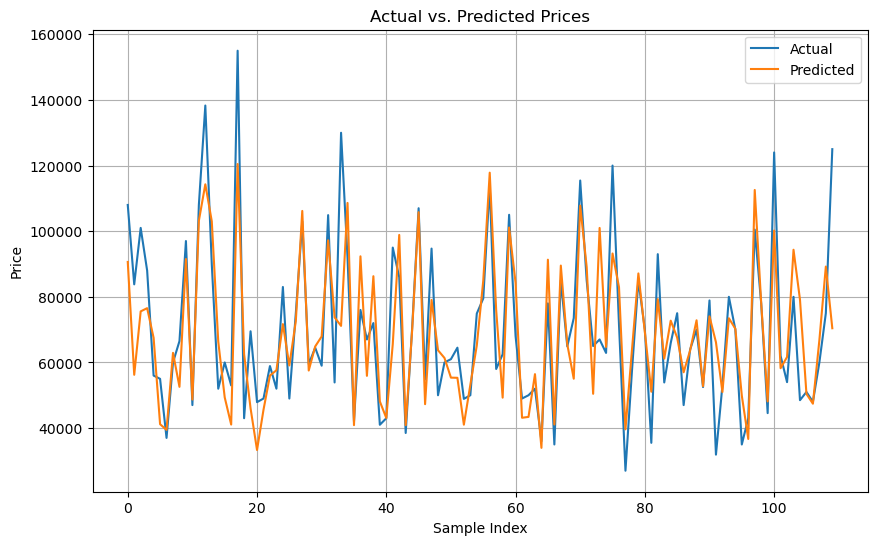

In [7]:
# Plot predicted and actual values as line plots

import matplotlib.pyplot as plt


# Plotting predicted and actual values as line plots
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


This doesn't look so bad, does it? Your model, although isn't perfect at this stage, is making a good attempt to predict house prices although a few prediction seem a bit out. There could be a number of reasons for this. Let's try to dig a bit deeper to check model's predictive abilities by comparing these prediction with actual values of `y_test` individually. That will help you calculate the RMSE value (root mean squared error) for your model. 

### Root Mean Squared Error
Here is the formula for RMSE:  

$$ \large RMSE = \sqrt{\sum^N_{i=1}\dfrac{ (\text{Predicted}_i-\text{Actual}_i)^2}{N}}$$

* Initialize an empty array `err`
* For each row in `y_test` and `y_pred`, take the squared difference and append error for each row in the `err` array
* Calculate $RMSE$ from `err` using the formula shown above 

In [8]:
# Calculate RMSE

# Initializing an empty array err
err = []

# For each row in y_test and y_pred, take the squared difference and append error for each row in the err array
for actual, predicted in zip(y_test, y_pred):
    squared_diff = (predicted - actual) ** 2
    err.append(squared_diff)

# Calculating RMSE from err using the formula
RMSE = np.sqrt(np.mean(err))

# RMSE value
print("Root Mean Squared Error (RMSE):", RMSE)

# Due to random split, your answers may vary
# RMSE = 14868.172645765708

Root Mean Squared Error (RMSE): 14885.67595222506


### Normalized root mean squared error
The above error is clearly in terms of the dependent variable, i.e., the final house price. You can also use a normalized mean squared error in case of multiple regression which can be calculated from RMSE using following the formula:

$$ \large NRMSE = \dfrac{RMSE}{max_i y_i - min_i y_i} $$

* Calculate normalized RMSE

In [9]:
# Calculate NRMSE

# Calculate NRMSE

# Calculating the range of the dependent variable (price)
y_range = np.max(y_test) - np.min(y_test)

# Calculating the Normalized RMSE (NRMSE)
NRMSE = RMSE / y_range

# NRMSE value
print("Normalized Root Mean Squared Error (NRMSE):", NRMSE)

# Due to random split, your answers may vary
# 0.09011013724706489

Normalized Root Mean Squared Error (NRMSE): 0.11629434337675827


There it is. A complete multiple regression analysis using nothing but NumPy. Having good programming skills in NumPy allows you to dig deeper into analytical algorithms in machine learning and deep learning. Using matrix multiplication techniques you saw here, you can easily build a whole neural network from scratch. 

## Level up (Optional)

* Calculate the R-squared and adjusted R-squared for the above model 
* Plot the residuals (similar to `statsmodels`) and comment on the variance and heteroscedasticity
* Run the experiment in `statsmodels` and compare the performance of both approaches in terms of computational cost

## Summary

In this lab, you built a predictive model for predicting house prices. Remember this is a very naive implementation of regression modeling. The purpose here was to get an introduction to the applications of linear algebra into machine learning and predictive analysis. There are a number of shortcomings in this modeling approach and you can further apply a number of data modeling techniques to improve this model. 